<a href="https://colab.research.google.com/github/Natakii/StockPricePrediction-Apple/blob/main/AppleStockPricePridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

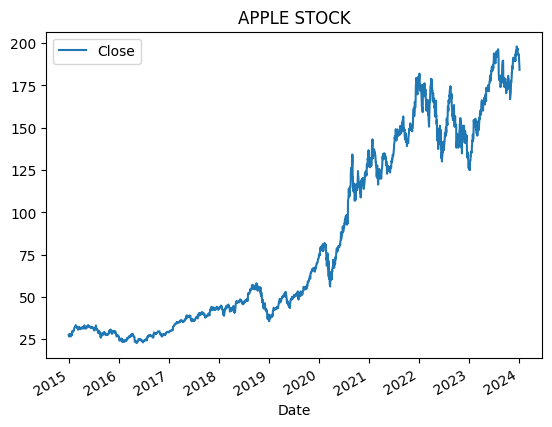

In [11]:
import pandas as pd
import numpy as np
import datetime
from datetime import date, time
from matplotlib import pyplot as plt

#installing Yahoo finance Libraries
try:
  import yfinance
except:
  !pip install -q yfinance
  import yfinance

try:
  import yahoofinancials
except:
  !pip install -q yahoofinancials
  import yahoofinancials

import yfinance as yf
from yahoofinancials import YahooFinancials

import warnings
warnings.filterwarnings("ignore")

#Download our Historical Data

df = yf.download("AAPL",
                 start= '2015-01-01',
                 end=date.today(),
                 progress=False,)
#create a single chart
df.plot(y='Close', title='APPLE STOCK')
plt.show()



***Technical Analysis Indicators***

---



---



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


,Open,High,Low,Close,Adj Close,Volume,RSI(5),RSI(20),RSI(50)
Date,,,,,,,,,
2015-03-17,31.475000,31.830000,31.412500,31.7600,28.541887,204092400,87.176121,57.381824,59.769766
2015-03-18,31.750000,32.290001,31.592501,32.1175,28.863167,261083600,92.936760,59.517517,60.898860
2015-03-19,32.187500,32.312500,31.850000,31.8750,28.645239,183238000,57.745465,57.461469,59.738371
2015-03-20,32.062500,32.099998,31.290001,31.4750,28.285765,274780400,25.674009,54.209916,57.881869
2015-03-23,31.780001,31.962500,31.629999,31.8025,28.580082,150838800,61.074783,56.339198,58.947739


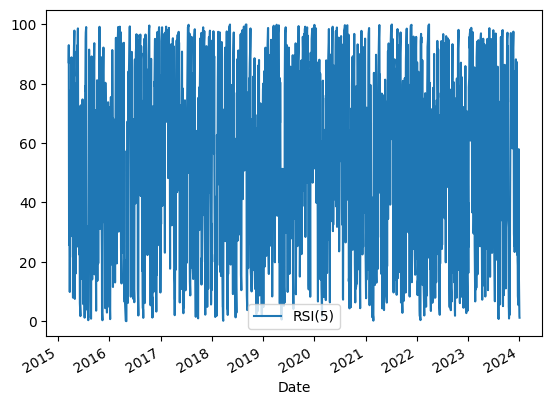

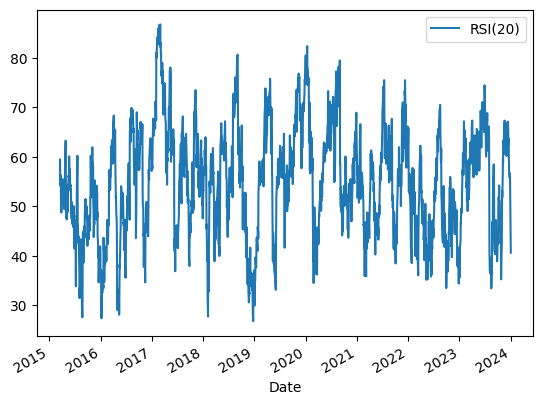

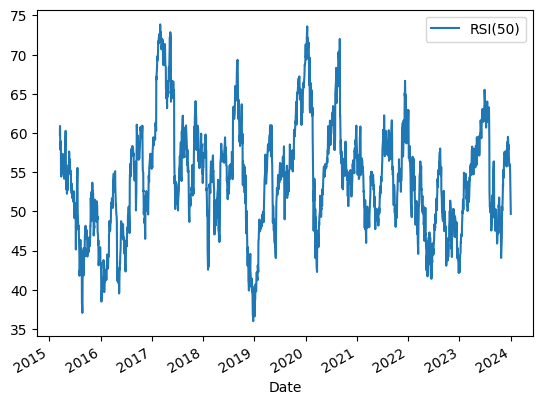

In [13]:
try:
  import pandas_ta as ta
except:
  !pip install -q pandas_ta
  import pandas_ta as ta

df['RSI(5)']= ta.rsi(df['Close'],length=2)
df['RSI(20)']= ta.rsi(df['Close'],length=20)
df['RSI(50)']= ta.rsi(df['Close'],length=50)
#df['CCI(50)']= ta.cci(close=df['Close'],length=50, high=df['High'],low=df['low'])

#drop null value
df=df.dropna()

#create a plot showing technical indicators
df.plot(y='RSI(5)')
df.plot(y='RSI(20)')
df.plot(y='RSI(50)')

#current data frame
df.head()

**Data labelling**

In [15]:
import numpy as np
df['LABEL'] = np.where (df['Open'].shift(-2).gt(df['Open'].shift(-1)),"1","0")
df=df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,RSI(5),RSI(20),RSI(50),LABEL
Date,,,,,,,,,,
2015-03-17,31.475000,31.830000,31.412500,31.7600,28.541887,204092400,87.176121,57.381824,59.769766,1
2015-03-18,31.750000,32.290001,31.592501,32.1175,28.863167,261083600,92.936760,59.517517,60.898860,0
2015-03-19,32.187500,32.312500,31.850000,31.8750,28.645239,183238000,57.745465,57.461469,59.738371,0
2015-03-20,32.062500,32.099998,31.290001,31.4750,28.285765,274780400,25.674009,54.209916,57.881869,1
2015-03-23,31.780001,31.962500,31.629999,31.8025,28.580082,150838800,61.074783,56.339198,58.947739,0


CREATING A NEURAL NETWORK
SKLEARN **bold text**

In [31]:
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

#Fitting Indicators and our Labelling
X = df[df.columns[6:-1]].values
y = df['LABEL'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=1000)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

print("\n Train data accuracy \n")
print(classification_report(y_train, predict_train))

print("\n Test data accuracy")
print(classification_report(y_test, predict_test))


 Train data accuracy 

              precision    recall  f1-score   support

           0       0.57      0.15      0.24       709
           1       0.56      0.90      0.69       842

    accuracy                           0.56      1551
   macro avg       0.57      0.53      0.47      1551
weighted avg       0.57      0.56      0.49      1551


 Test data accuracy
              precision    recall  f1-score   support

           0       0.49      0.12      0.19       305
           1       0.54      0.89      0.68       360

    accuracy                           0.54       665
   macro avg       0.52      0.51      0.44       665
weighted avg       0.52      0.54      0.46       665



**Backtesting model**

1.   Returns obtained by our model




[]

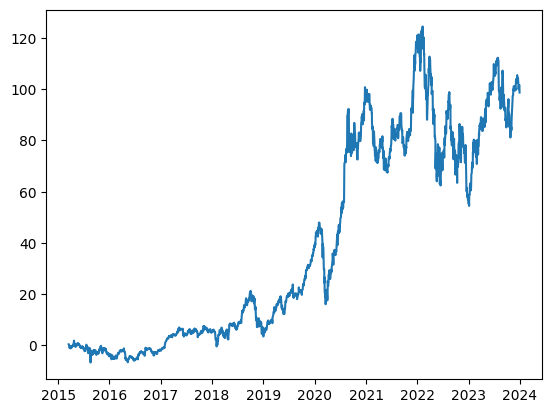

In [39]:
df['Prediction']=np.append(predict_train, predict_test)
df['Strategy Returns'] = np.where(df['Prediction'].eq('1'), df['Open'].shift(-2) - df['Open'].shift(-1), 0)
df['Strategy Returns'] = df['Strategy Returns'].cumsum()
plt.plot(df['Strategy Returns'])
plt.plot()

**Forecasting Todays** **Return**

In [41]:
prediction = df.iloc[-1]['Prediction']
if prediction == -1:
  print("market will be us today")
else:
  print("Market will be Down today")

Market will be Down today
